In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Step 1: Read data from CSV and rename columns
data = pd.read_csv('dataset.csv')

# Rename PubchemFP columns to x1, x2, x3, ..., x881
new_column_names = ['x{}'.format(i) for i in range(1, 882)]
data.columns = new_column_names + ['pIC50']  # Assuming the last column is pIC50

# Prepare data for modeling
X = data[new_column_names]  # Features
y = data['pIC50']  # Target variable

In [ ]:
# Step 2: Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Step 3: Normalize features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [ ]:
# Step 4: Define the range of threshold values to search over
threshold_values = [0.01, 0.05, 0.1, 0.15, 0.2]

In [ ]:
# Step 5: Perform grid search to find the optimal threshold
best_threshold = None
best_mse = np.inf
mse_values = []

for threshold in threshold_values:
    # Apply variance thresholding
    selector = VarianceThreshold(threshold=threshold)
    X_train_filtered = selector.fit_transform(X_train_scaled)
    X_val_filtered = selector.transform(X_val_scaled)

    # Train Random Forest Regression on filtered features
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train_filtered, y_train)

    # Evaluate model on validation set
    y_pred = rf_model.predict(X_val_filtered)
    mse = mean_squared_error(y_val, y_pred)
    mse_values.append(mse)

    # Check if this threshold gives a better MSE
    if mse < best_mse:
        best_mse = mse
        best_threshold = threshold

Best Threshold: 0.2
Best MSE: 0.8115166772080401


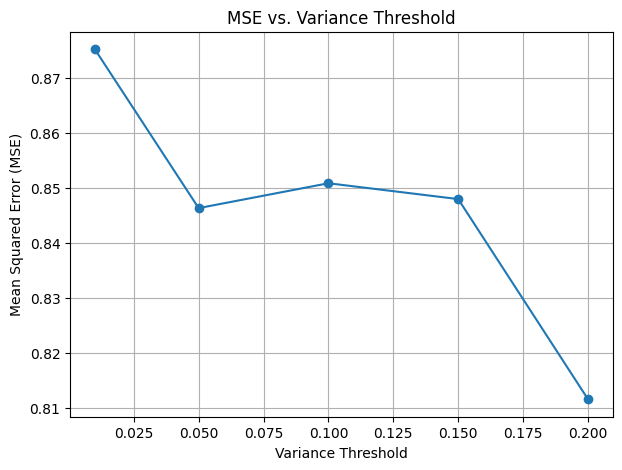

In [ ]:
# Step 6: Print the best threshold and corresponding MSE
print(f"Best Threshold: {best_threshold}")
print(f"Best MSE: {best_mse}")

# Optional: Plot MSE vs. Threshold
plt.figure(figsize=(7, 5))
plt.plot(threshold_values, mse_values, marker='o')
plt.xlabel('Variance Threshold')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs. Variance Threshold')
plt.grid(True)
plt.savefig('MSE vs. Variance Threshold.png')
plt.show()